In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from Util import plot_confront

PLOT ERRORS

In [2]:
saturation = 0.7
linewidth = 1
width = 0.7
dpi = 100
fontsize = 18
sns.set_style('darkgrid')
with open(f'sol/analytics.pkl', 'rb') as f:
    err_map_mean_pm, err_map_theta_pm, err_pm_mean_pm, err_pm_theta_pm,\
                 err_map_mean_eb, err_pm_mean_eb,\
                 err_map_mean_fb, err_map_theta_fb, err_pm_mean_fb, err_pm_theta_fb,\
                 err_map_mean_em, err_map_theta_em, err_pm_mean_em, err_pm_theta_em,\
                 cpu_time_pm, cpu_time_fb, cpu_time_em, ess_pm, ess_fb, ess_em, ess_eb = pickle.load(f)

PLOT DATA

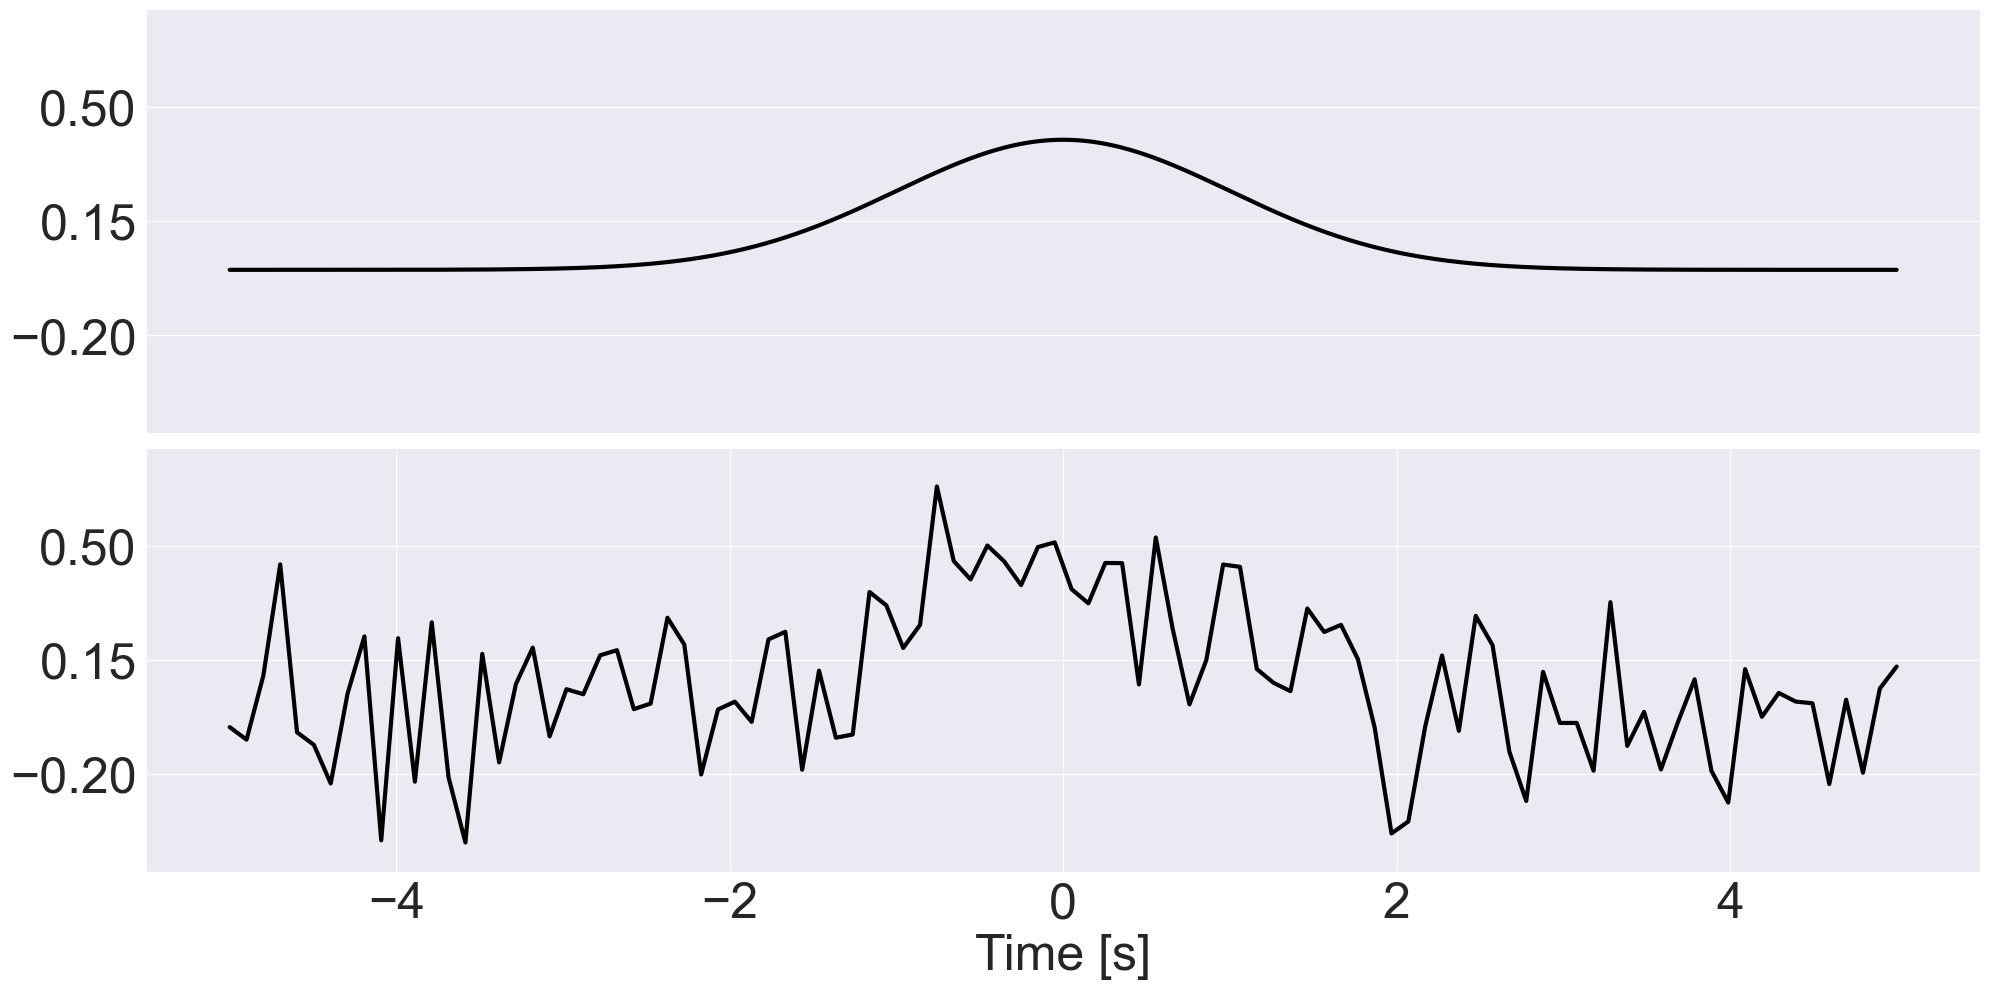

In [3]:
with open(f'data/data_0.pkl', 'rb') as f:
    sourcespace, data, true_noise = pickle.load(f)

fig, ax = plt.subplots(2,1, figsize=(20, 10))

plt.sca(ax[0])
plt.plot(np.linspace(-5, 5, 1000), stats.norm.pdf(np.linspace(-5, 5, 1000), 0, 1), 'k', linewidth=3)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel(None)
plt.yticks([-0.2, 0.15, 0.5], size=2*fontsize)
plt.xticks([])
plt.ylim([-0.5,0.8])

plt.sca(ax[1])
plt.plot(sourcespace, data, 'k', linewidth=3)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel(None)
plt.xlabel('Time [s]', size=2*fontsize)
plt.xticks([-4, -2, 0, 2, 4], size=2*fontsize)
plt.yticks([-0.2, 0.15, 0.5], size=2*fontsize)
plt.ylim([-0.5,0.8])

plt.tight_layout()
plt.savefig('fig/data_toy.jpg', dpi=dpi)
plt.show()

PLOT ERROR THETA AND MEAN

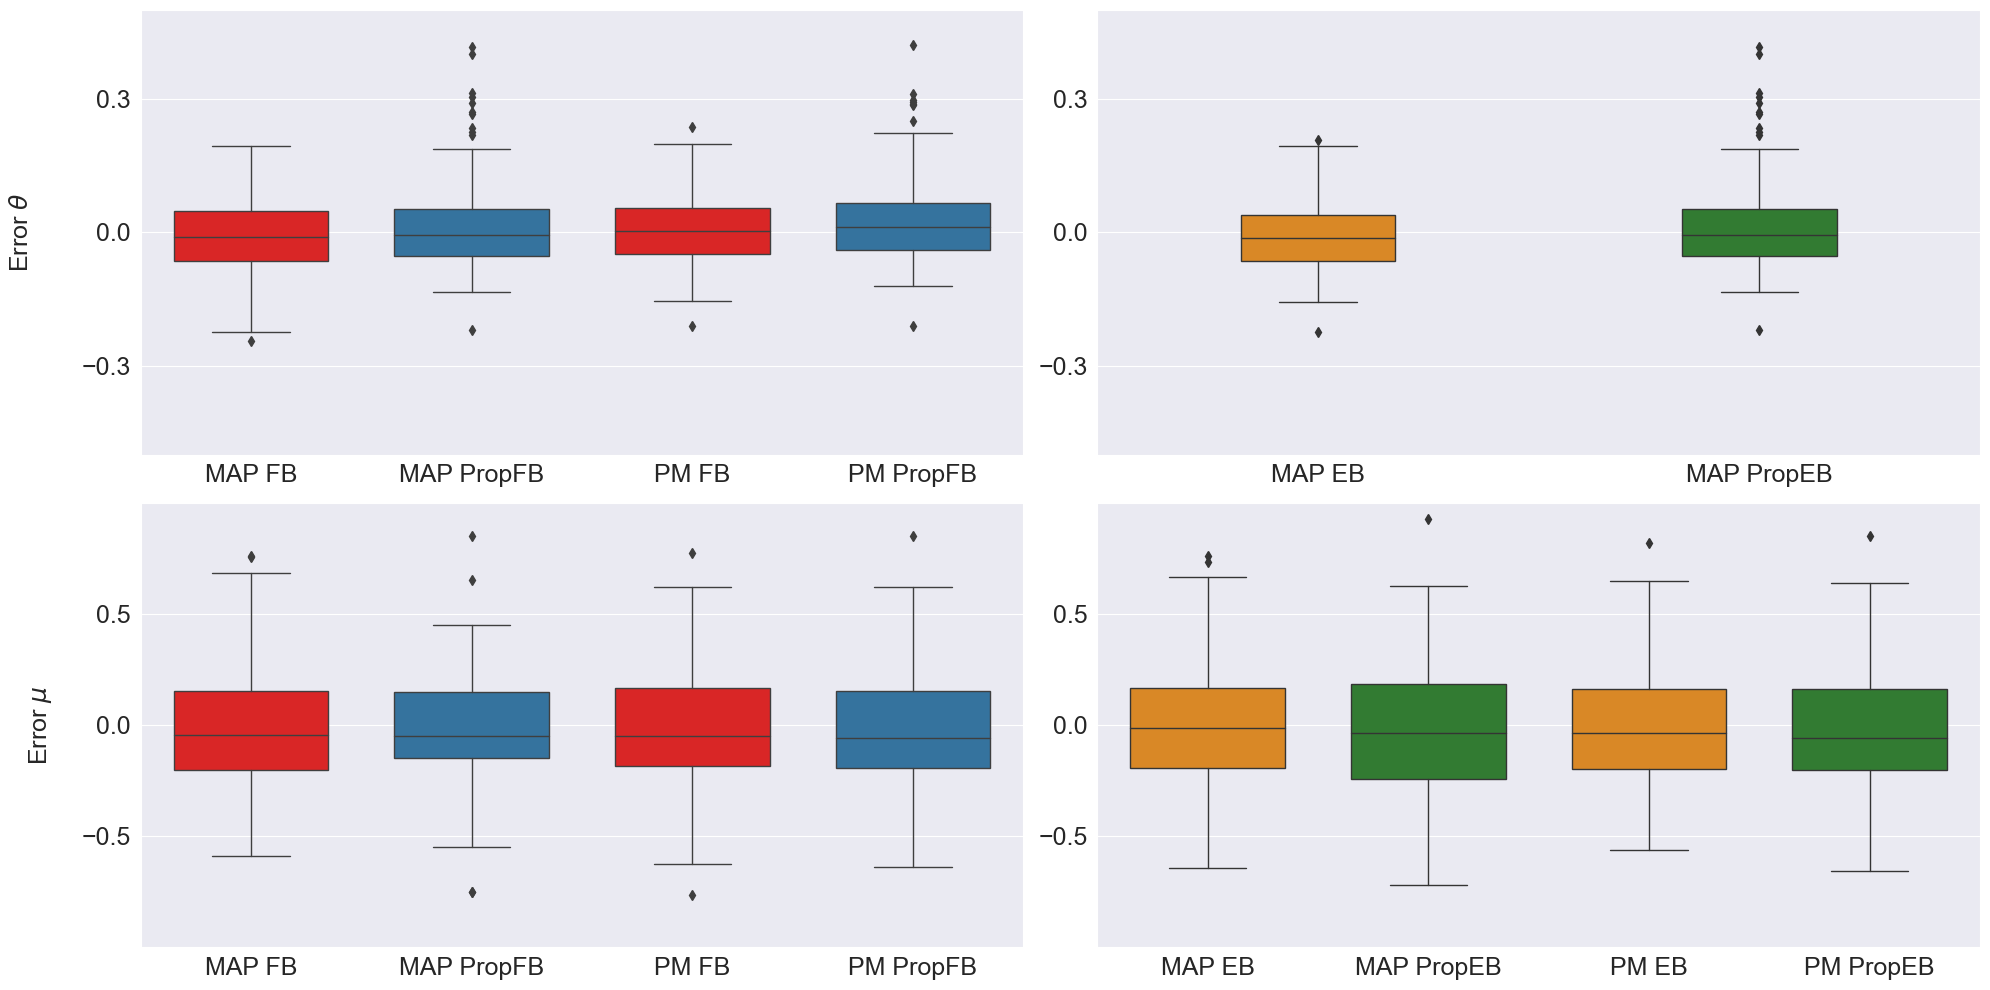

In [4]:
fin_it = 0
fig, ax = plt.subplots(2, 2, figsize=(20, 10), dpi=100)
data = [np.sort(err_map_mean_fb)[fin_it:], np.sort(err_map_mean_em)[fin_it:], np.sort(err_map_mean_pm)[fin_it:],
        np.sort(err_pm_mean_fb)[fin_it:], np.sort(err_pm_mean_em)[fin_it:], np.sort(err_pm_mean_pm)[fin_it:]]

plt.sca(ax[0,0])
sns.boxplot(data=[err_map_theta_fb, err_map_theta_pm, err_pm_theta_fb, err_pm_theta_pm], palette=['red', '#1f77b4', 'red', '#1f77b4'],
            saturation=saturation, width=width, linewidth=linewidth)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.ylim([-0.5, 0.5])
plt.yticks([-0.3, 0, 0.3], size=fontsize)
plt.ylabel(r'Error $\theta$', fontsize=fontsize, rotation=90, labelpad=35)
plt.xticks([0, 1, 2, 3], ['MAP FB', 'MAP PropFB', 'PM FB', 'PM PropFB'], size=fontsize)

plt.sca(ax[0,1])
sns.boxplot(data=[err_map_theta_em, err_map_theta_pm], palette=['darkorange', 'forestgreen'], saturation=saturation, width=0.5*width, linewidth=linewidth)

plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.ylim([-0.5, 0.5])
plt.yticks([-0.3, 0, 0.3], size=fontsize)
plt.xticks([0, 1], ['MAP EB', 'MAP PropEB'], size=fontsize)

plt.sca(ax[1,0])
sns.boxplot(data=[np.sort(err_map_mean_fb)[fin_it:], np.sort(err_map_mean_pm)[fin_it:], np.sort(err_pm_mean_fb)[fin_it:], np.sort(err_pm_mean_pm)[fin_it:]],
            palette=['red', '#1f77b4', 'red', '#1f77b4'], saturation=saturation, width=width, linewidth=linewidth)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.xticks([0, 1, 2, 3], ['MAP FB', 'MAP PropFB', 'PM FB', 'PM PropFB'], size=fontsize)
plt.ylim([-1, 1])
plt.yticks([-0.5, 0, 0.5], size=fontsize)

plt.ylabel(r'Error $\mu$', fontsize=fontsize, rotation=90, labelpad=20)

plt.sca(ax[1,1])
sns.boxplot(data=[np.sort(err_map_mean_em)[fin_it:], np.sort(err_map_mean_eb)[fin_it:], np.sort(err_pm_mean_em)[fin_it:], np.sort(err_pm_mean_eb)[fin_it:]],
            palette=['darkorange', 'forestgreen', 'darkorange', 'forestgreen'], saturation=saturation, width=width, linewidth=linewidth)
plt.xticks([0, 1, 2, 3], ['MAP EB', 'MAP PropEB', 'PM EB', 'PM PropEB'], size=fontsize)
plt.ylim([-1, 1])
plt.yticks([-0.5, 0, 0.5], size=fontsize)

plt.tight_layout()
plt.savefig('fig/results_toy.png', dpi=dpi)
plt.show()

PLOT CPU TIME

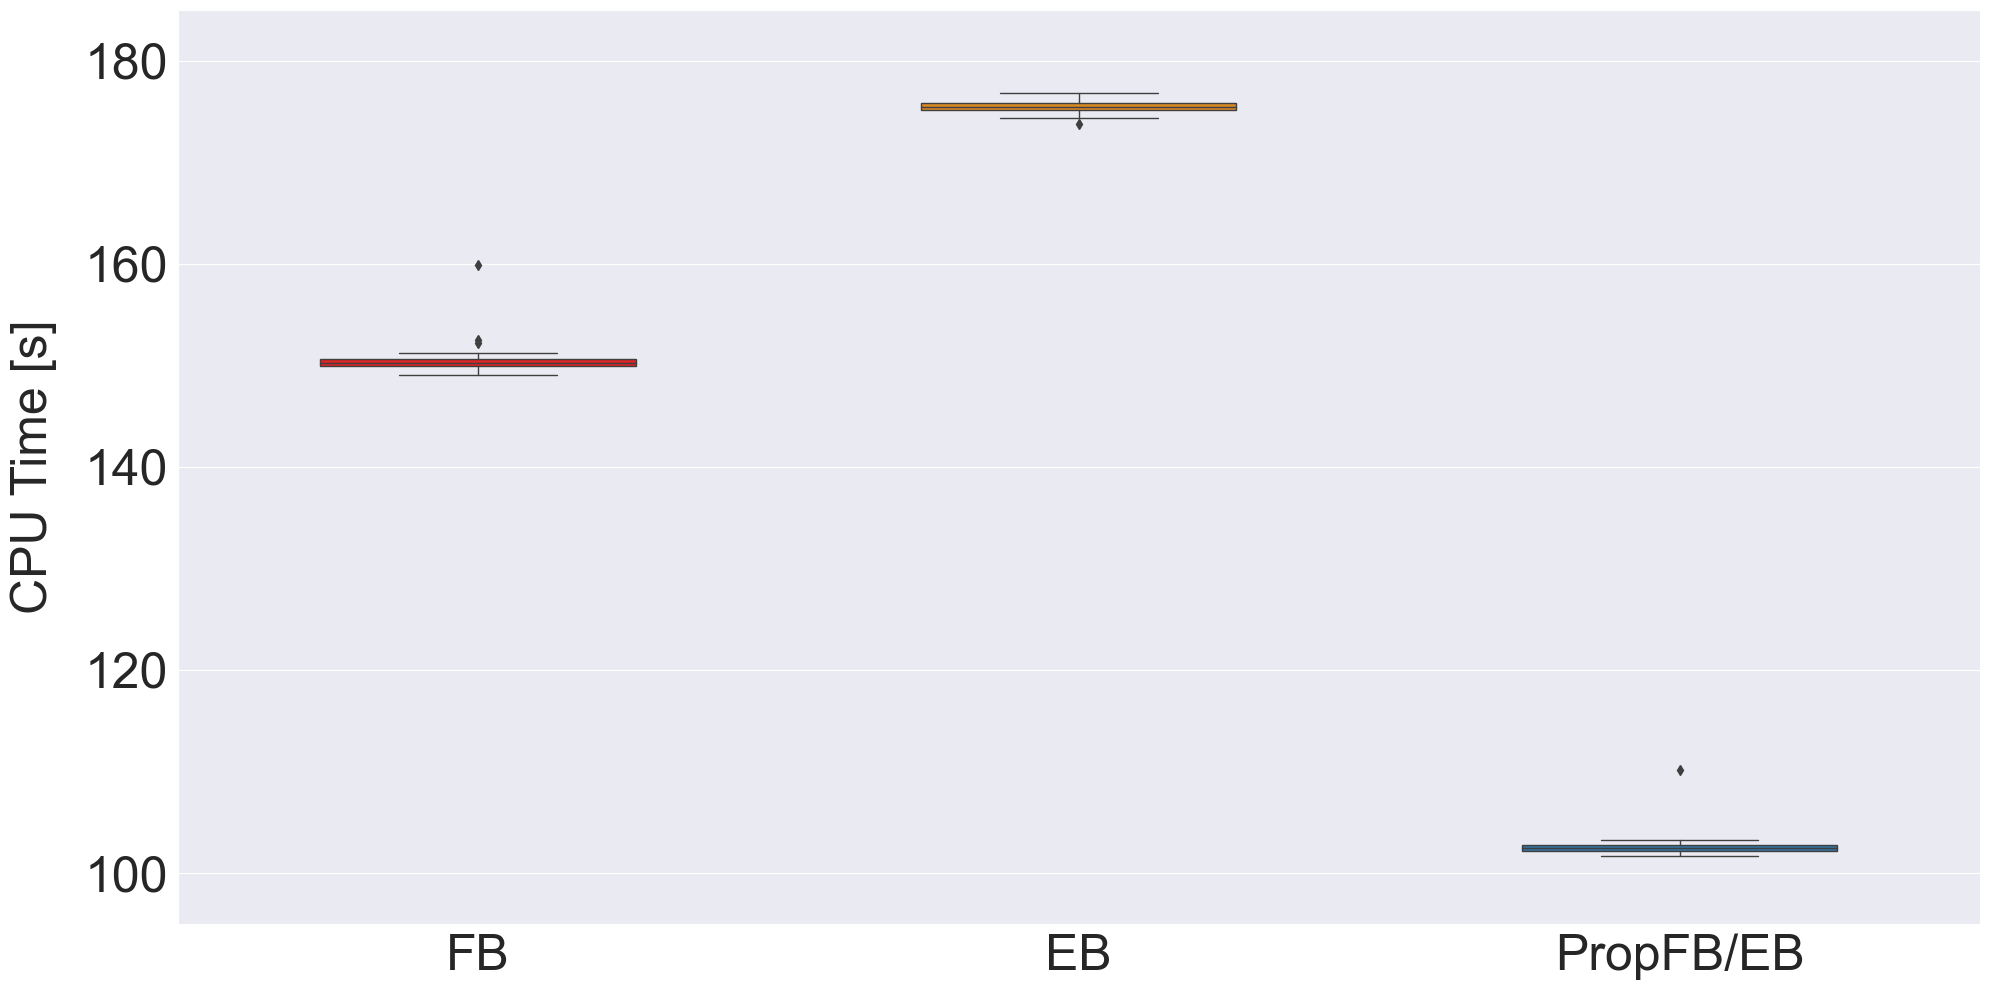

In [10]:
plt.figure(figsize=(20, 10), dpi=100)
sns.boxplot(data=[cpu_time_fb, cpu_time_em, cpu_time_pm], palette=['red', 'darkorange', '#1f77b4'],
            saturation=saturation, width=3/4*width, linewidth=linewidth)
plt.xticks([0, 1, 2], ['FB', 'EB', 'PropFB/EB'], size=2*fontsize)
plt.yticks([100, 120, 140, 160, 180], size=2*fontsize)
plt.ylim([95,185])
plt.ylabel('CPU Time [s]', fontsize=2*fontsize, rotation=90, labelpad=20)
plt.tight_layout()
plt.savefig('fig/cpu_time_toy.png', dpi=dpi)
plt.show()

PLOT ESS

<function matplotlib.pyplot.show(close=None, block=None)>

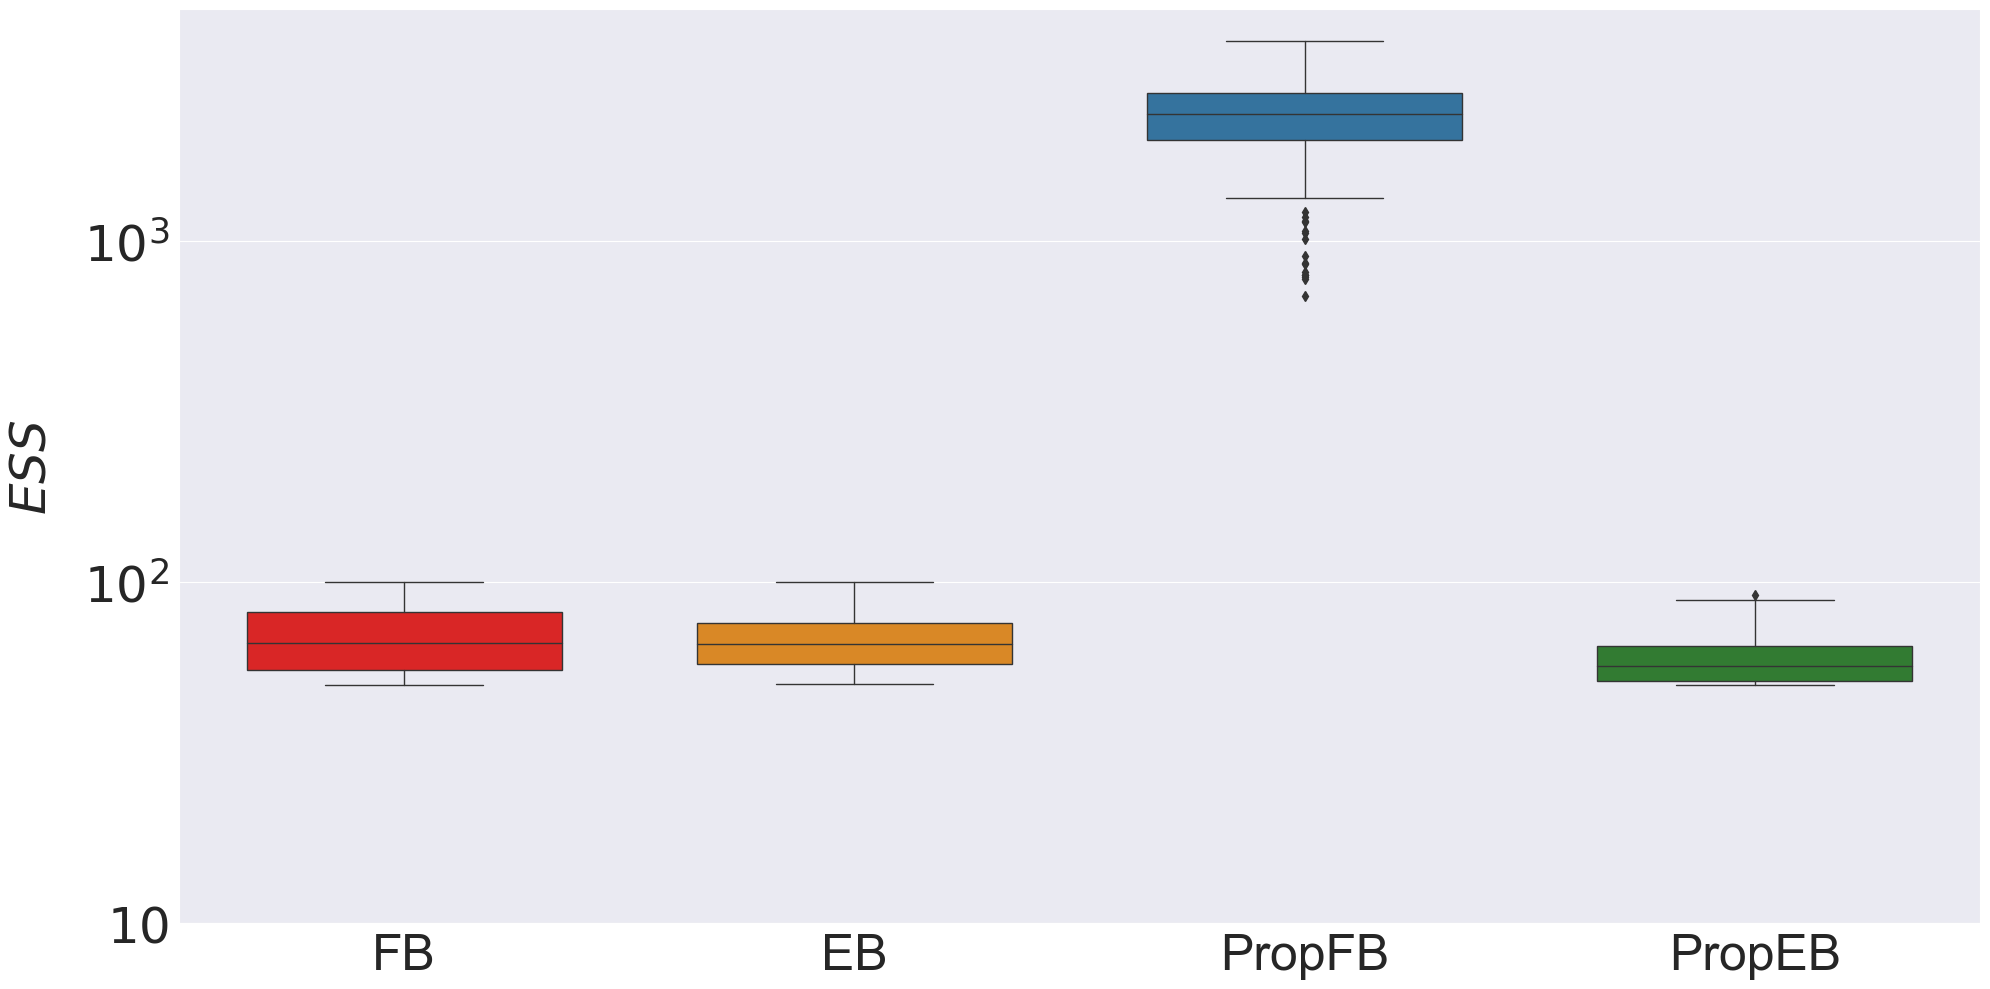

In [11]:
plt.figure(figsize=(20, 10), dpi=100)
sns.boxplot(data=[np.log10(ess_fb), np.log10(ess_em), np.log10(ess_pm), np.log10(ess_eb)], palette=['red', 'darkorange', '#1f77b4', 'forestgreen'],
            saturation=saturation, width=width, linewidth=linewidth)
plt.ylabel(r'$ESS$', fontsize=2*fontsize, rotation=90, labelpad=20)
plt.xticks([0, 1, 2, 3], ['FB', 'EB', 'PropFB', 'PropEB'], size=2*fontsize)
plt.yticks([1, 2, 3], [r'$10$', r'$10^2$', r'$10^3$'], fontsize=2*fontsize)
plt.tight_layout()
plt.savefig('fig/ess_toy.png', dpi=dpi)
plt.show

PLOT ONE SOLUTION

theta_true=0.21212121212121213


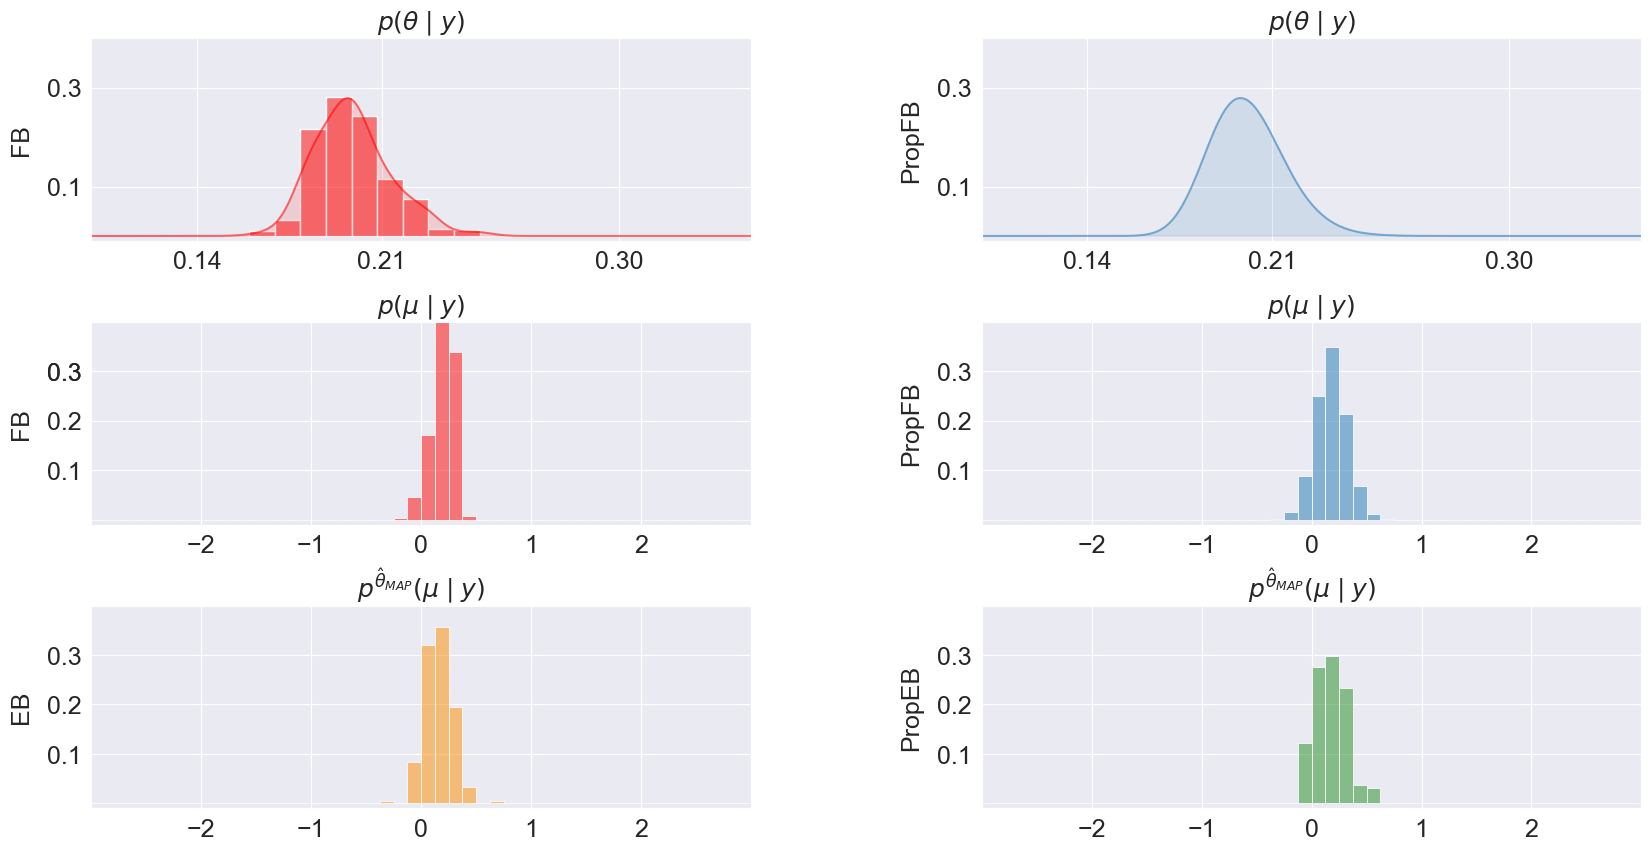

In [14]:
idx=12
theta_true = np.linspace(0.2, 0.3, 100)[idx]
print(f'theta_true={theta_true}')
with open(f'sol/sol_pm_new_{idx}.pkl', 'rb') as f:
    post_pm = pickle.load(f)
with open(f'sol/sol_fb_new_{idx}.pkl', 'rb') as f:
    post_fb = pickle.load(f)
with open(f'sol/sol_em_new_{idx}.pkl', 'rb') as f:
    post_em = pickle.load(f)

plt.figure(figsize=(20, 10))
ax = [plt.subplot(3,2,1), plt.subplot(3,2,2), plt.subplot(3,2,3), plt.subplot(3,2,4), plt.subplot(3,2,5), plt.subplot(3,2,6)]

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.4)

plt.sca(ax[0])
sns.histplot(x=post_fb.vector_theta, stat='probability', weights=post_fb.vector_weight, bins=21, color='red', alpha=0.5)
f = stats.gaussian_kde(post_fb.vector_theta, weights=post_fb.vector_weight).pdf(post_pm.grid_theta)
f /= np.max(f)
f *= np.max(post_em.theta_posterior/np.sum(post_em.theta_posterior))
plt.plot(post_pm.grid_theta, f, color='red', alpha=0.5)
plt.fill_between(post_pm.grid_theta, f, color='red', alpha=0.125)
plt.xlim([0.1,0.35])
plt.ylim([-0.01,0.4])
plt.xticks([0.14, 0.21, 0.3], fontsize=fontsize)
plt.yticks([0.1, 0.3], fontsize=fontsize)
plt.ylabel('FB', fontsize=fontsize, rotation=90, labelpad=10)
plt.title(r'$p(\theta\mid y)$', fontsize=fontsize)

post_fb.vector_mean.append(-5)
post_fb.vector_mean.append(5)
post_fb.vector_weight.append(0)
post_fb.vector_weight.append(0)

plt.sca(ax[1])
plt.plot(post_pm.grid_theta, post_pm.theta_posterior/np.max(post_pm.theta_posterior)*np.max(post_em.theta_posterior/np.sum(post_em.theta_posterior)), color='#1f77b4', alpha=0.5)
plt.fill_between(post_pm.grid_theta, post_pm.theta_posterior/np.max(post_pm.theta_posterior)*np.max(post_em.theta_posterior/np.sum(post_em.theta_posterior)), color='#1f77b4', alpha=0.125)
plt.xlim([0.1,0.35])
plt.ylim([-0.01,0.4])
plt.xticks([0.14, 0.21, 0.3], fontsize=fontsize)
plt.yticks([0.1, 0.3], fontsize=fontsize)
plt.ylabel('PropFB', fontsize=fontsize, rotation=90, labelpad=10)
plt.title(r'$p(\theta\mid y)$', fontsize=fontsize)

post_pm.vector_mean.append(-5)
post_pm.vector_mean.append(5)
post_pm.vector_weight.append(0)
post_pm.vector_weight.append(0)

b = 80
a = 3

plt.sca(ax[2])
sns.histplot(x=post_fb.vector_mean, stat='probability', weights=post_fb.vector_weight, bins=b, color='red', alpha=0.5)
plt.xlim([-a,a])
plt.yticks([0.1, 0.2, 0.3, 0.3], fontsize=fontsize)
plt.xticks([-2, -1, 0, 1, 2], fontsize=fontsize)
plt.ylim([-0.01,0.4])
plt.ylabel('FB', fontsize=fontsize, rotation=90, labelpad=10)
plt.title(r'$p(\mu\mid y)$', fontsize=fontsize)

plt.sca(ax[3])
sns.histplot(x=post_pm.vector_mean, stat='probability', weights=post_pm.vector_weight, bins=b, color='#1f77b4', alpha=0.5)
plt.xlim([-a,a])
plt.yticks([0.1, 0.2, 0.3], fontsize=fontsize)
plt.xticks([-2, -1, 0, 1, 2], fontsize=fontsize)
plt.ylim([-0.01,0.4])
plt.ylabel('PropFB', fontsize=fontsize, rotation=90, labelpad=10)
plt.title(r'$p(\mu\mid y)$', fontsize=fontsize)

post_em.vector_mean.append(-5)
post_em.vector_mean.append(5)
post_em.vector_weight.append(0)
post_em.vector_weight.append(0)

plt.sca(ax[4])
sns.histplot(x=post_em.vector_mean, stat='probability', weights=post_em.vector_weight, bins=b, color='darkorange', alpha=0.5)
plt.xlim([-a,a])
plt.ylim([-0.01,0.4])
plt.yticks([0.1, 0.2, 0.3], fontsize=fontsize)
plt.xticks([-2, -1, 0, 1, 2], fontsize=fontsize)
plt.ylabel('EB', fontsize=fontsize, rotation=90, labelpad=10)
plt.title(r'$p^{\hat\theta_{MAP}}(\mu\mid y)$', fontsize=fontsize)

plt.sca(ax[5])
vector_mean = []
vector_weight = []
for _p in post_pm.all_particles[post_pm.best_iter]:
    vector_mean.append(_p.mean)
    vector_weight.append(_p.weight)
vector_mean.append(5)
vector_mean.append(-5)
vector_weight.append(0)
vector_weight.append(0)
sns.histplot(x=vector_mean, stat='probability', weights=vector_weight, bins=b, color='forestgreen', alpha=0.5)
plt.xlim([-a,a])
plt.ylim([-0.01,0.4])
plt.yticks([0.1, 0.2, 0.3], fontsize=fontsize)
plt.xticks([-2, -1, 0, 1, 2], fontsize=fontsize)
plt.title(r'$p^{\hat\theta_{MAP}}(\mu\mid y)$', fontsize=fontsize)
plt.ylabel('PropEB', fontsize=fontsize, rotation=90, labelpad=10)

plt.savefig('fig/one_example_toy.jpg', dpi=dpi)
plt.show()

In [168]:
def plot_one_solution(idx, plt_show, plt_save, linewidth=2, fontsize=18):
    #theta true
    theta_true = np.linspace(0.2, 0.3, 100)[idx]
    print(theta_true)
    #loading
    with open(f'sol/sol_pm_new_{idx}.pkl', 'rb') as f:
        post_pm = pickle.load(f)
    vector_mean = []
    vector_weight = []
    for _p in post_pm.all_particles[post_pm.best_iter]:
        vector_mean.append(_p.mean)
        vector_weight.append(_p.weight)

    with open(f'sol/sol_fb_new_{idx}.pkl', 'rb') as f:
        post_fb = pickle.load(f)

    with open(f'sol/sol_em_new_{idx}.pkl', 'rb') as f:
        post_em = pickle.load(f)

    #posterior mean
    x = np.linspace(-4,4,1000)
    post_mean_pm = stats.gaussian_kde(post_pm.vector_mean, weights=post_pm.vector_weight).pdf(x)
    post_mean_pm /= np.sum(post_mean_pm)

    post_mean_pm_em = stats.gaussian_kde(vector_mean, weights=vector_weight).pdf(x)
    post_mean_pm_em /= np.sum(post_mean_pm_em)

    post_mean_em = stats.gaussian_kde(post_em.vector_mean, weights=post_em.vector_weight).pdf(x)
    post_mean_em /= np.sum(post_mean_em)

    post_mean_fb = stats.gaussian_kde(post_fb.vector_mean, weights=post_fb.vector_weight).pdf(x)
    post_mean_fb /= np.sum(post_mean_fb)

    #posterior theta
    theta = post_pm.grid_theta
    post_theta_pm = post_pm.theta_posterior/np.sum(post_pm.theta_posterior)
    post_theta_fb = stats.gaussian_kde(post_fb.vector_theta, weights=post_fb.vector_weight).pdf(theta)
    post_theta_fb /= np.sum(post_theta_fb)

    #plot
    fig, ax = plt.subplots(3,1, figsize=(16,9))

    ax[0].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[0].plot(theta, post_theta_pm, color='#1f77b4', linewidth=linewidth, label='PropFB')
    ax[0].fill_between(theta, post_theta_pm, color='#1f77b4', alpha=0.125)
    ax[0].plot(theta, post_theta_fb, color='red', linewidth=linewidth, label='FB')
    ax[0].fill_between(theta, post_theta_fb, color='red', alpha=0.125)
    ax[0].vlines(theta_true, ymin=0, ymax=0.06, linestyles=':', linewidth=linewidth, colors='green')
    ax[0].set_title(r'$p(\theta\mid y)$', size=fontsize)
    ax[0].set_xlim([0.12, 0.36])
    ax[0].set_ylim([0, 0.06])
    #ax[0].tick_params(axis='both', fontsize=fontsize)
    ax[0].set_xticks([0.16, 0.2, 0.24, 0.28, 0.32], fontsize=fontsize)
    ax[0].set_yticks([ 0.02, 0.04], fontsize=fontsize)
    ax[0].legend(fontsize=fontsize)

    ax[1].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[1].plot(x, post_mean_pm, color='#1f77b4', linewidth=linewidth, label='PropFB')
    ax[1].fill_between(x, post_mean_pm, color='#1f77b4', alpha=0.125)
    ax[1].plot(x, post_mean_fb, color='red', linewidth=linewidth, label='FB')
    ax[1].fill_between(x, post_mean_fb, color='red', alpha=0.125)
    ax[1].vlines(0, ymin=0, ymax=0.035, linestyles=':', linewidth=linewidth, colors='green')
    ax[1].set_title(r'$p(\mu\mid y)$', size=fontsize)
    ax[1].set_xlim([-2, 2])
    ax[1].set_ylim([0, 0.03])
    ax[1].set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5], fontsize=fontsize)
    ax[1].set_yticks([ 0.01, 0.02], fontsize=fontsize)
    ax[1].legend(fontsize=fontsize)

    ax[2].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[2].plot(x, post_mean_pm_em, color='green', linewidth=linewidth, label='PropEB')
    ax[2].fill_between(x, post_mean_pm_em, color='green', alpha=0.125)
    ax[2].plot(x, post_mean_em, color='darkorange', linewidth=linewidth, label='EB')
    ax[2].fill_between(x, post_mean_em, color='darkorange', alpha=0.125)
    ax[2].vlines(0, ymin=0, ymax=0.035, linestyles=':', linewidth=linewidth, colors='green')
    ax[2].set_title(r'$p^{\hat{\theta}_{MAP}}(\mu\mid y)$', size=fontsize)
    ax[2].set_xlim([-2, 2])
    ax[2].set_ylim([0, 0.03])
    ax[2].set_xticks([-1.5,-1,-0.5,0,0.5,1,1.5], fontsize=fontsize)
    ax[2].set_yticks([0.01, 0.02], fontsize=fontsize)
    ax[2].legend(fontsize=fontsize)

    plt.tight_layout()
    if plt_save:
        plt.savefig(f'fig/one_example_toy_iter_{idx}.jpg', dpi=dpi)
    if plt_show:
        plt.show()
    else:
        plt.close()

0.2404040404040404


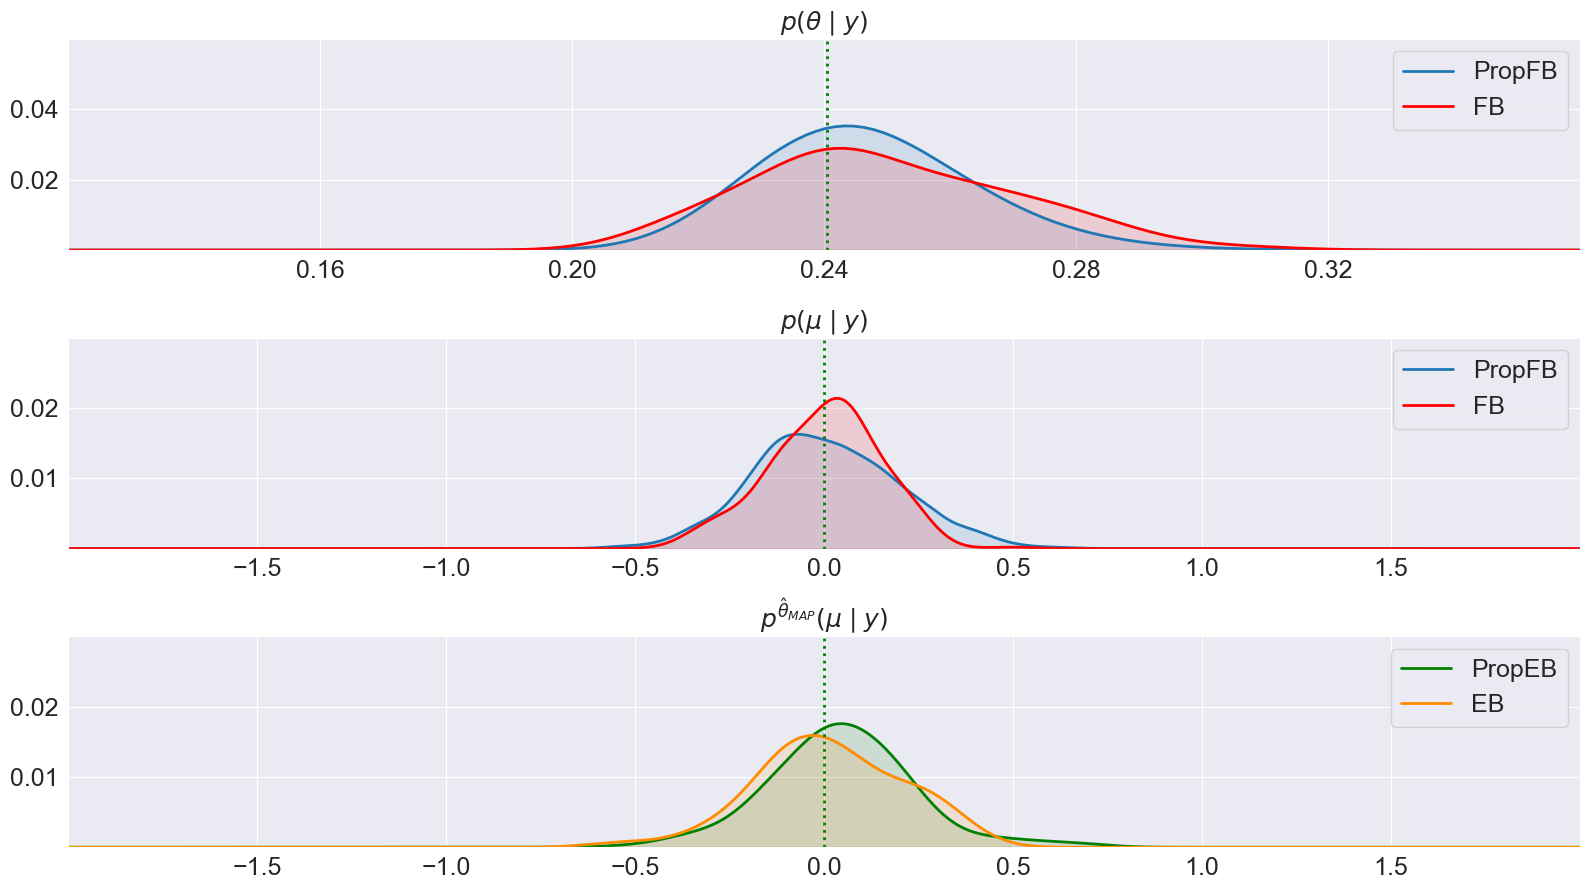

In [169]:
idx = 40
plot_one_solution(idx, plt_show=True, plt_save=True)

In [ ]:
num_iter_pm, num_iter_fb, num_iter_eb = np.zeros((3, 100))

for idx in range(100):
    with open(f'sol/sol_pm_new_{idx}.pkl', 'rb') as f:
        post_pm = pickle.load(f)
    num_iter_pm[idx] = np.size(post_pm.exponent_like)
    with open(f'sol/sol_fb_new_{idx}.pkl', 'rb') as f:
        post_fb = pickle.load(f)
    num_iter_fb[idx] = np.size(post_fb.exponent_like)
    with open(f'sol/sol_em_new_{idx}.pkl', 'rb') as f:
        post_eb = pickle.load(f)
    num_iter_eb[idx] = np.size(post_eb.exponent_like)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\viani\AppData\Local\Temp/ipykernel_33988/3685804526.py", line 4, in <module>
    with open(f'sol/sol_pm_new_{idx}.pkl', 'rb') as f:
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Us

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\viani\AppData\Local\Temp/ipykernel_33988/3685804526.py", line 4, in <module>
    with open(f'sol/sol_pm_new_{idx}.pkl', 'rb') as f:
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\viani

In [159]:
plt.figure(figsize=(20,10))
sns.boxplot(data=[num_iter_fb, num_iter_eb, num_iter_pm], palette=['red', 'darkorange', '#1f77b4'],
            saturation=saturation, width=3/4*width, linewidth=linewidth)

plt.xticks([0, 1, 2], ['FB', 'EB', 'PropFB/EB'], size=2*fontsize)
#plt.yticks([30, 60, 90], size=2*fontsize)
plt.ylabel('N° Iterations', fontsize=2*fontsize, rotation=90, labelpad=20)
plt.tight_layout()
plt.savefig('fig/number_iter.png', dpi=dpi)
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 467


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\viani\AppData\Local\Temp/ipykernel_33988/4175193682.py", line 10, in <module>
    plt.show()
  File "C:\Users\viani\Anaconda3\Lib\site-packages\matplotlib\pyplot.py", line 378, in show
    return _backend_mod.show(*args, **kwargs)
  File "C:\Users\viani\Anaconda3\Lib\site-packages\matplotlib_inline\backend_inline.py", line 41, in show
    display(
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\viani\Anaconda3\Lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "C:\Users\viani\Anaconda3\Lib\site-packages\decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File 

TypeError: object of type 'NoneType' has no len()